In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("../data/processed/advanced_cleaned_data.csv")
df.head()


,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget,season,malaria_lag_1,malaria_lag_3,outbreak_flag
0,2000,1,Saint Kitts and Nevis,Central,14.742725,0.000000,16.447042,9.846464,22,1,441,4936,Winter,101.0,53.0,0
1,2000,1,Lesotho,Central,12.411940,224.323243,114.397538,9.208128,60,88,296,1288,Winter,22.0,17.0,0
2,2000,1,Isle of Man,Central,18.674863,10.868287,0.000000,11.514195,0,100,397,4671,Winter,60.0,101.0,0
3,2000,1,Guyana,Central,18.845423,2.401021,47.879011,8.686426,89,106,458,2650,Winter,0.0,22.0,0
4,2000,1,Bahamas,Central,19.529292,98.441882,103.878215,9.814734,21,41,238,961,Winter,89.0,60.0,0


In [3]:
region_df = df.groupby("region").agg({
    "avg_temp_c": "mean",
    "precipitation_mm": "mean",
    "population_density": "mean",
    "healthcare_budget": "mean",
    "malaria_cases": "mean",
    "outbreak_flag": "mean"
}).reset_index()

region_df


,region,avg_temp_c,precipitation_mm,population_density,healthcare_budget,malaria_cases,outbreak_flag
0,Central,20.268049,175.418200,300.176251,2752.616750,68.664994,0.136755
1,East,20.048461,219.943527,198.990039,2396.566597,74.899931,0.170952
2,North,20.425838,193.203113,275.376321,3231.163265,68.571284,0.131278
3,South,18.763561,193.558400,283.815313,2783.039079,68.075843,0.136199
4,West,21.957862,193.456821,250.495890,2571.585967,73.513720,0.160820


In [4]:
X_cluster = region_df[
    [
        "avg_temp_c",
        "precipitation_mm",
        "population_density",
        "healthcare_budget"
    ]
]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
region_df["risk_cluster"] = kmeans.fit_predict(X_scaled)

region_df


,region,avg_temp_c,precipitation_mm,population_density,healthcare_budget,malaria_cases,outbreak_flag,risk_cluster
0,Central,20.268049,175.418200,300.176251,2752.616750,68.664994,0.136755,2
1,East,20.048461,219.943527,198.990039,2396.566597,74.899931,0.170952,0
2,North,20.425838,193.203113,275.376321,3231.163265,68.571284,0.131278,1
3,South,18.763561,193.558400,283.815313,2783.039079,68.075843,0.136199,2
4,West,21.957862,193.456821,250.495890,2571.585967,73.513720,0.160820,2


In [7]:
region_df.groupby("risk_cluster")[["malaria_cases", "outbreak_flag"]].mean()


,malaria_cases,outbreak_flag
risk_cluster,,
0,74.899931,0.170952
1,68.571284,0.131278
2,70.084852,0.144591


In [8]:
risk_map = {
    0: "Low Risk",
    1: "Medium Risk",
    2: "High Risk"
}

region_df["risk_level"] = region_df["risk_cluster"].map(risk_map)
region_df


,region,avg_temp_c,precipitation_mm,population_density,healthcare_budget,malaria_cases,outbreak_flag,risk_cluster,risk_level
0,Central,20.268049,175.418200,300.176251,2752.616750,68.664994,0.136755,2,High Risk
1,East,20.048461,219.943527,198.990039,2396.566597,74.899931,0.170952,0,Low Risk
2,North,20.425838,193.203113,275.376321,3231.163265,68.571284,0.131278,1,Medium Risk
3,South,18.763561,193.558400,283.815313,2783.039079,68.075843,0.136199,2,High Risk
4,West,21.957862,193.456821,250.495890,2571.585967,73.513720,0.160820,2,High Risk


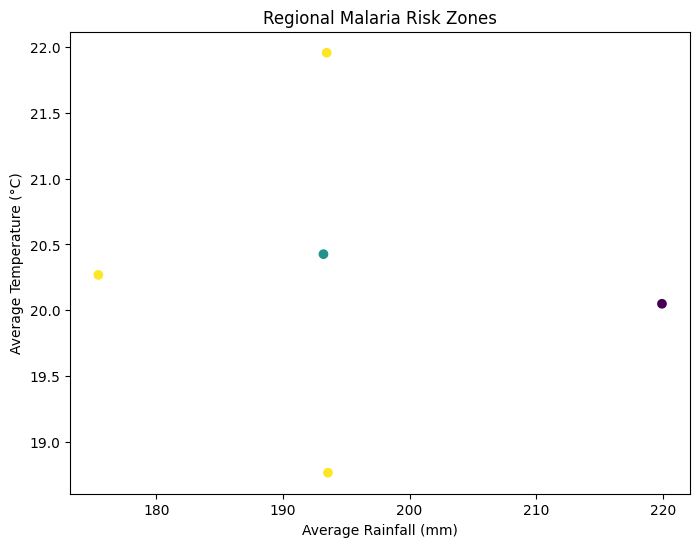

In [9]:
plt.figure(figsize=(8,6))

plt.scatter(
    region_df["precipitation_mm"],
    region_df["avg_temp_c"],
    c=region_df["risk_cluster"]
)

plt.xlabel("Average Rainfall (mm)")
plt.ylabel("Average Temperature (°C)")
plt.title("Regional Malaria Risk Zones")

plt.savefig("../visuals/risk_zones_advanced.png", bbox_inches="tight")
plt.show()


In [10]:
region_df.to_csv("../data/processed/region_risk_zones.csv", index=False)
